# Outlier Naver DataLab Search

## 필요 라이브러리 로드

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, math

In [65]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [66]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [67]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import chromedriver_autoinstaller as ca
import random, time

In [68]:
import glob
import shutil

### 파일 불러오기

In [80]:
# 기간 설정
start_date = '2022-05-09'
end_date = '2022-05-15'

In [81]:
f_path = 'c:/data/Wantreez/Crawling/music'
try:
    os.chdir(f_path)
except:
    pass

In [82]:
code_path = os.getcwd().replace('\\', '/')
code_path

'c:/data/Wantreez/Crawling/music'

In [83]:
# 실시간 순위 파일 폴더로 이동
save_folder = f'/crawled_data/outlier_data/{start_date}_{end_date}/'
path = code_path + save_folder
path

'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/2022-05-09_2022-05-15/'

In [84]:
file_list = os.listdir(path)
file_list

['2022-05-09_2022-05-15_agency_in_chart.xlsx',
 '2022-05-09_2022-05-15_mean_outlier_agency.xlsx',
 '2022-05-09_2022-05-15_Top10_rank_change_df.xlsx',
 '2022-05-09_2022-05-15_total_outlier.png',
 '2022-05-09_2022-05-15_total_outlier.xlsx',
 'bugs',
 'flo',
 'genie',
 'ky',
 'melon',
 'naver_datalab',
 'tj',
 'vibe']

In [85]:
# 이상치 음원 파일 가져오기
for one in file_list:
    if 'total_outlier' in one:
        file_name = one
file_name

'2022-05-09_2022-05-15_total_outlier.xlsx'

In [86]:
df = pd.read_excel(path + file_name)
df

,날짜,순위변동평균(양수),곡,가수,소속사,순위,앨범,소속사_분류,순위변동,사이트
0,2022-05-11,34.3,Dynamite,방탄소년단,빅히트,63,Dynamite (DayTime Version),빅히트,27,Bugs
1,2022-05-13,42.0,forEVER (feat. TABLO),싸이 (PSY),P NATION,38,싸다9,기타,42,Bugs
2,2022-05-12,61.0,꽃 길,BIGBANG (빅뱅),YG,33,꽃 길,YG,61,Bugs
3,2022-05-11,51.0,너의 모든 순간,성시경,SSK,44,별에서 온 그대 (SBS 수목드라마) OST - Part.7,기타,54,Bugs
4,2022-05-14,35.0,너의 번호를 누르고,김나영,플렉스엠,62,너의 번호를 누르고,기타,35,Bugs
5,2022-05-10,50.0,다시 만날 수 있을까,임영웅,물고기뮤직,17,IM HERO,기타,49,Bugs
6,2022-05-13,54.0,레이디버드,잔나비,페포니뮤직,21,잔나비 소곡집 ll : 초록을거머쥔우리는,기타,54,Bugs
7,2022-05-10,34.0,무지개,임영웅,물고기뮤직,47,IM HERO,기타,34,Bugs
8,2022-05-10,48.0,손이 참 곱던 그대,임영웅,물고기뮤직,50,IM HERO,기타,48,Bugs
9,2022-05-13,38.0,슬픔이여안녕,잔나비,페포니뮤직,10,잔나비 소곡집 ll : 초록을거머쥔우리는,기타,38,Bugs


## 네이버 데이터랩 검색

In [99]:
naver_datalab_path = f'/crawled_data/outlier_data/{start_date}_{end_date}/naver_datalab/outliers/'
des = code_path + naver_datalab_path
des

'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/2022-05-09_2022-05-15/naver_datalab/outliers/'

In [100]:
os.makedirs(des, exist_ok=True)

In [101]:
ca.install(True)
driver = webdriver.Chrome()

In [107]:
for i in range(df.shape[0]):
    # 네이버 데이터 랩 접속
    url = 'https://datalab.naver.com/keyword/trendSearch.naver'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()

    # 검색어 입력
    word = df['곡'][i]
    search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
    search_box.clear()
    time.sleep( random.uniform(1, 1.5) )
    search_box.send_keys(word)

    # 3개월 picker 클릭
    time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[3]').click()
    time.sleep( random.uniform(1, 1.5) )

    # 검색 버튼 클릭
    search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()
    time.sleep( random.uniform(1, 1.5) )
    driver.implicitly_wait(3)

    # 다운 버튼 클릭
    down_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div[1]/div[1]/div[1]/div/div/div/div/div/div[1]/div[4]/a').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    down_folder = 'C:/Users/kbjung/Downloads/'
    down_xlsx = 'datalab.xlsx'
    title = df['곡'][i]
    artist = df['가수'][i]
    new_down_xlsx = f'{title}_{artist}.xlsx'
    os.rename(down_folder + down_xlsx, down_folder + new_down_xlsx)

    # 파일 이동
    shutil.move(down_folder + new_down_xlsx, des + new_down_xlsx)
    print(f'{new_down_xlsx} 완료.')

C:\Users\kbjung\AppData\Local\Temp/ipykernel_14124/1643070766.py:11: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_14124/1643070766.py:17: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[3]').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_14124/1643070766.py:21: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()
C:\Users\kbjung\AppData\L

Dynamite_방탄소년단.xlsx 완료.
forEVER (feat. TABLO)_싸이 (PSY).xlsx 완료.
꽃 길_BIGBANG (빅뱅).xlsx 완료.
너의 모든 순간_성시경.xlsx 완료.
너의 번호를 누르고_김나영.xlsx 완료.
다시 만날 수 있을까_임영웅.xlsx 완료.
레이디버드_잔나비.xlsx 완료.
무지개_임영웅.xlsx 완료.
손이 참 곱던 그대_임영웅.xlsx 완료.
슬픔이여안녕_잔나비.xlsx 완료.
어제처럼_폴킴(Paul Kim).xlsx 완료.
언제나 사랑해_케이시.xlsx 완료.
에잇 (Prod. & Feat. SUGA of BTS)_아이유 (IU).xlsx 완료.


In [108]:
driver.quit()

## 이상치 노래 그래프

In [109]:
outlier_file_list = os.listdir(des)
outlier_file_list

['Dynamite_방탄소년단.xlsx',
 'forEVER (feat. TABLO)_싸이 (PSY).xlsx',
 '꽃 길_BIGBANG (빅뱅).xlsx',
 '너의 모든 순간_성시경.xlsx',
 '너의 번호를 누르고_김나영.xlsx',
 '다시 만날 수 있을까_임영웅.xlsx',
 '레이디버드_잔나비.xlsx',
 '무지개_임영웅.xlsx',
 '손이 참 곱던 그대_임영웅.xlsx',
 '슬픔이여안녕_잔나비.xlsx',
 '어제처럼_폴킴(Paul Kim).xlsx',
 '언제나 사랑해_케이시.xlsx',
 '에잇 (Prod. & Feat. SUGA of BTS)_아이유 (IU).xlsx']

In [110]:
one = outlier_file_list[3]
title = one.split('_')[0]
artist = one.split('_')[1]
temp = pd.read_excel(des + one).reset_index(drop=True)
temp = temp.iloc[6:, :].reset_index(drop=True)
temp.columns = ['날짜', '검색비율']
temp.head()

C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,날짜,검색비율
0,2022-02-15,51.99485
1,2022-02-16,49.12054
2,2022-02-17,45.34534
3,2022-02-18,47.53324
4,2022-02-19,57.82925


In [111]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      90 non-null     object
 1   검색비율    90 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [112]:
week_temp = temp[ (temp['날짜'] >= start_date) & (temp['날짜'] <= end_date)].reset_index(drop=True)
week_temp['검색비율'] = week_temp['검색비율'].astype(float)
week_temp['검색비율'] = round(week_temp['검색비율'], 1)
week_temp

,날짜,검색비율
0,2022-05-09,48.7
1,2022-05-10,51.0
2,2022-05-11,56.0
3,2022-05-12,63.4
4,2022-05-13,74.3
5,2022-05-14,95.2
6,2022-05-15,81.0


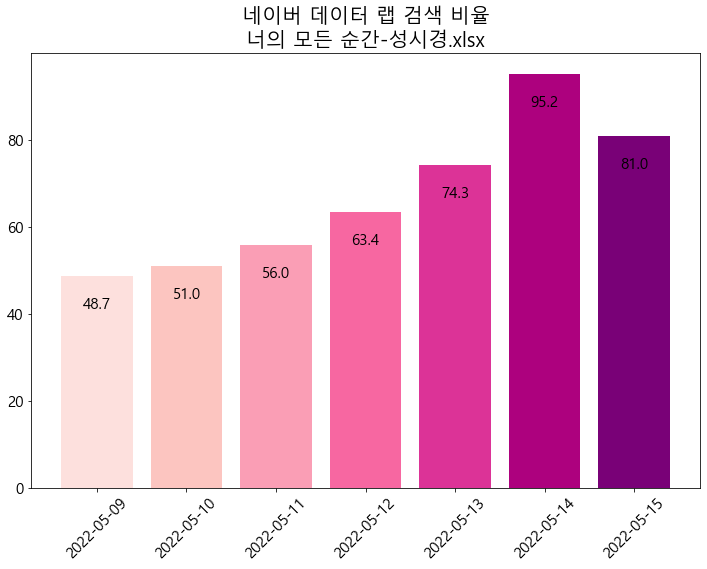

In [113]:
colors = sns.color_palette('RdPu', week_temp.shape[0])
x = week_temp['날짜']
y = week_temp['검색비율']
try:
        interval_ratio = math.ceil( max(y) )*0.05
        interval_ratio2 = math.ceil( max(y) )*0.2
        plt.figure( figsize=(12,8) )
        plt.bar(x, y, color=colors)
        plt.title(f"네이버 데이터 랩 검색 비율\n{title}-{artist}", fontsize=20)
        plt.xticks(fontsize=15,rotation=45)
        plt.yticks(fontsize=15)
        for i in range( len(y) ):
                if y[i] <= interval_ratio2:
                        plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                        horizontalalignment='center',
                        verticalalignment='bottom')
                else:
                        plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                        horizontalalignment='center',
                        verticalalignment='top')
except:
        pass

C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Dynamite_방탄소년단.png 저장 완료.
forEVER (feat. TABLO)_싸이 (PSY).png 저장 완료.
꽃 길_BIGBANG (빅뱅).png 저장 완료.
너의 모든 순간_성시경.png 저장 완료.
너의 번호를 누르고_김나영.png 저장 완료.
다시 만날 수 있을까_임영웅.png 저장 완료.
레이디버드_잔나비.png 저장 완료.
무지개_임영웅.png 저장 완료.
손이 참 곱던 그대_임영웅.png 저장 완료.
슬픔이여안녕_잔나비.png 저장 완료.
어제처럼_폴킴(Paul Kim).png 저장 완료.
언제나 사랑해_케이시.png 저장 완료.
에잇 (Prod. & Feat. SUGA of BTS)_아이유 (IU).png 저장 완료.


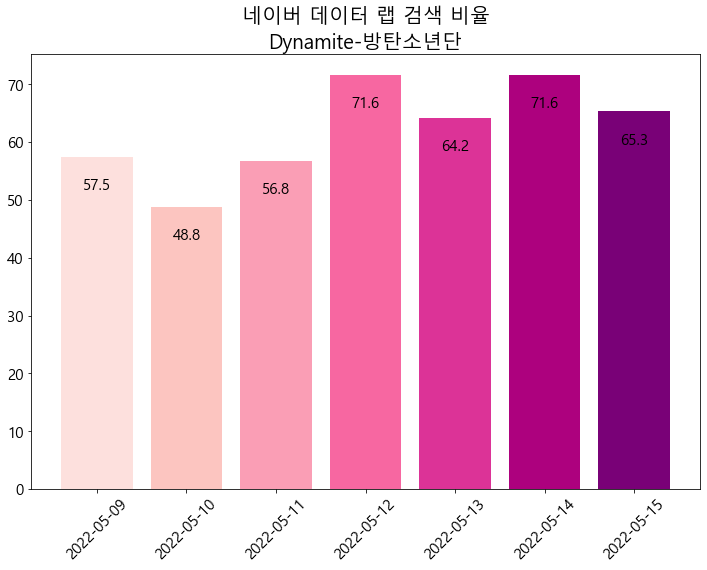

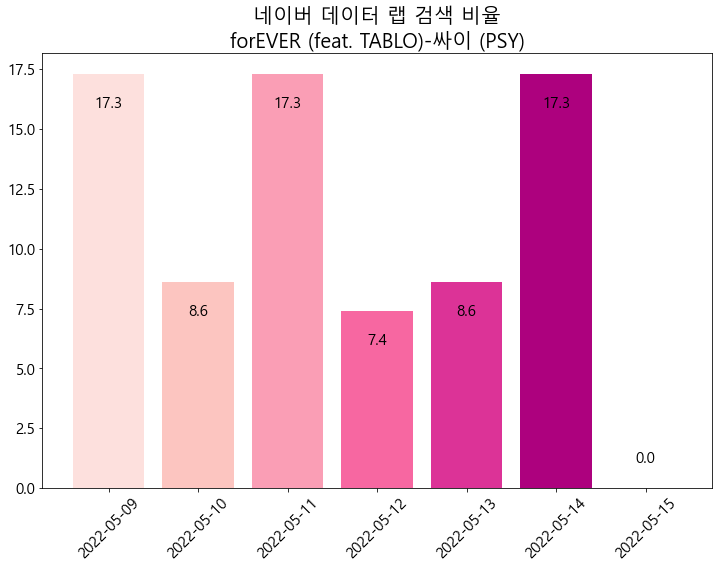

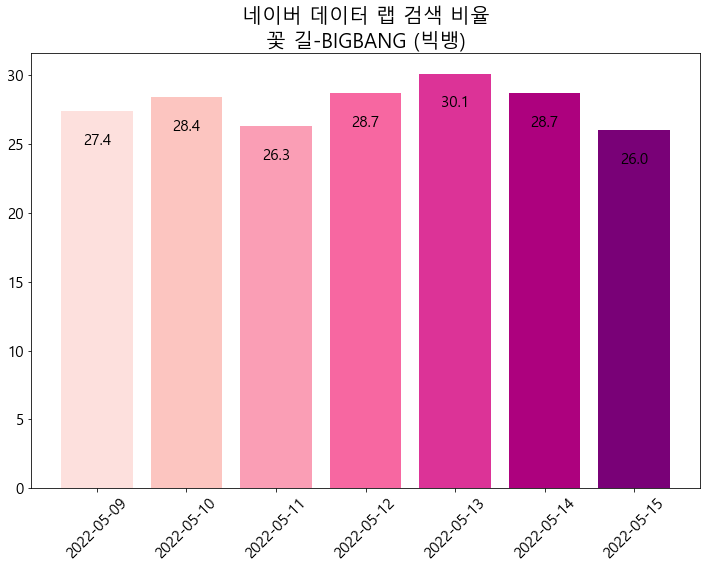

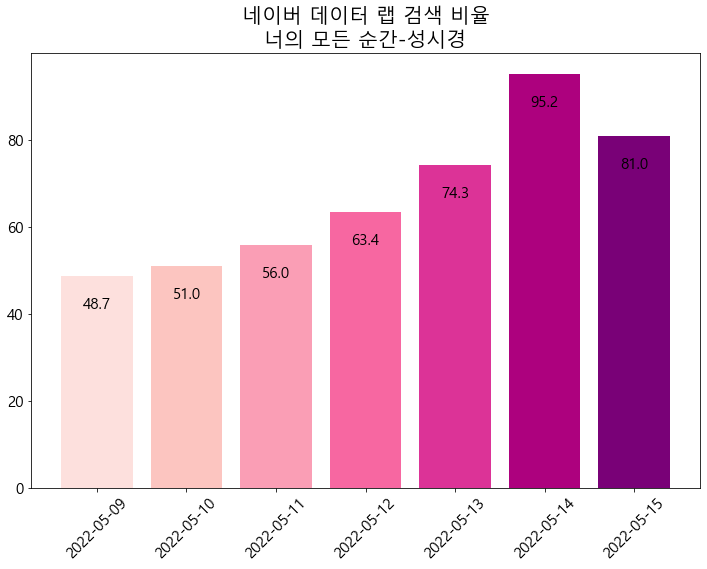

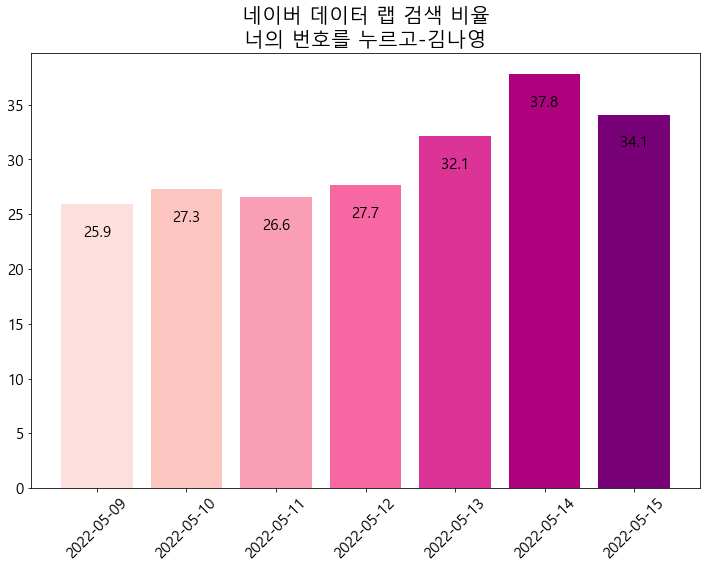

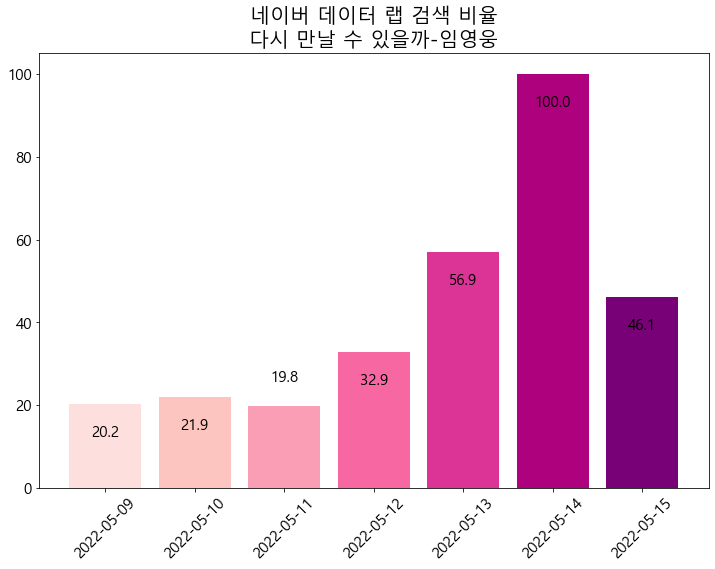

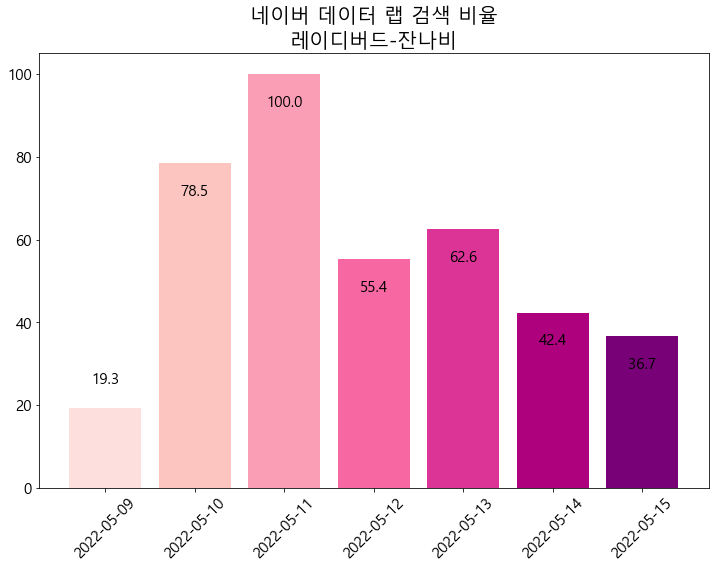

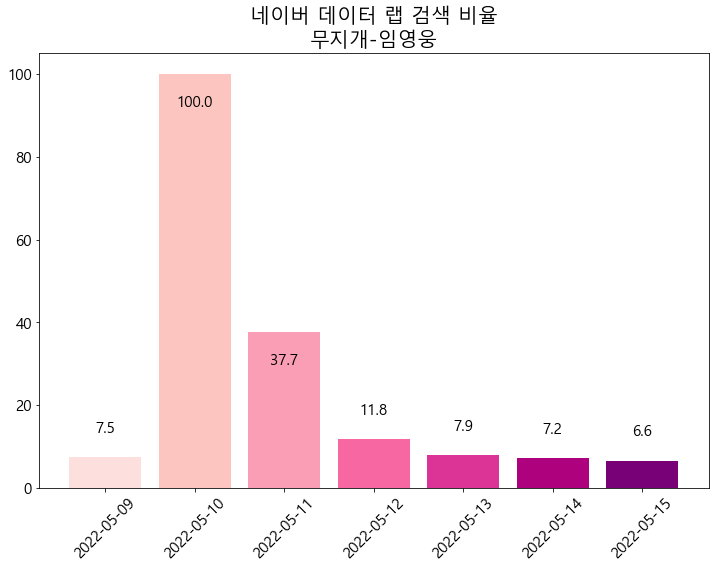

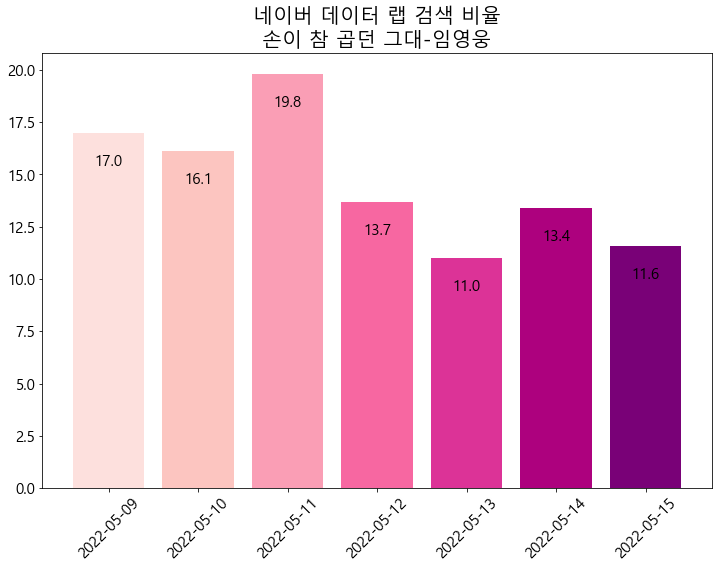

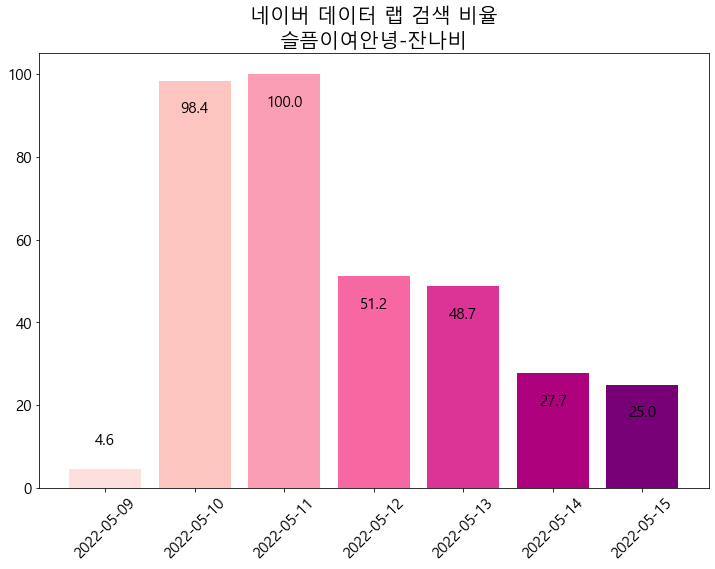

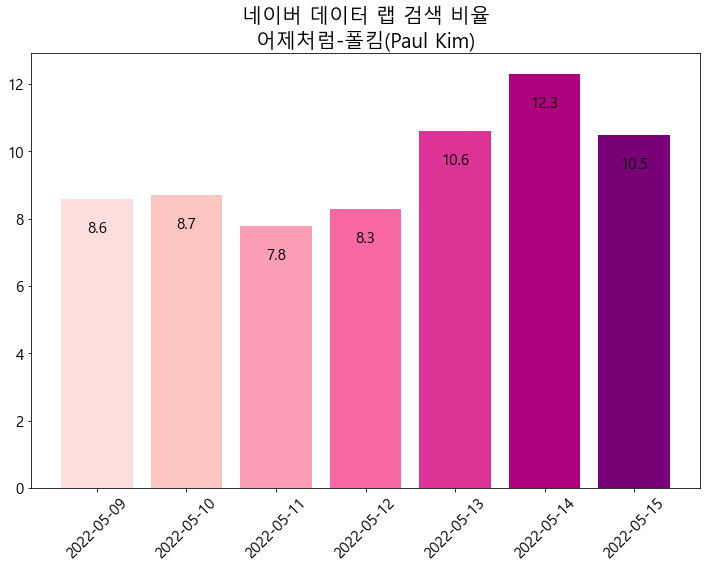

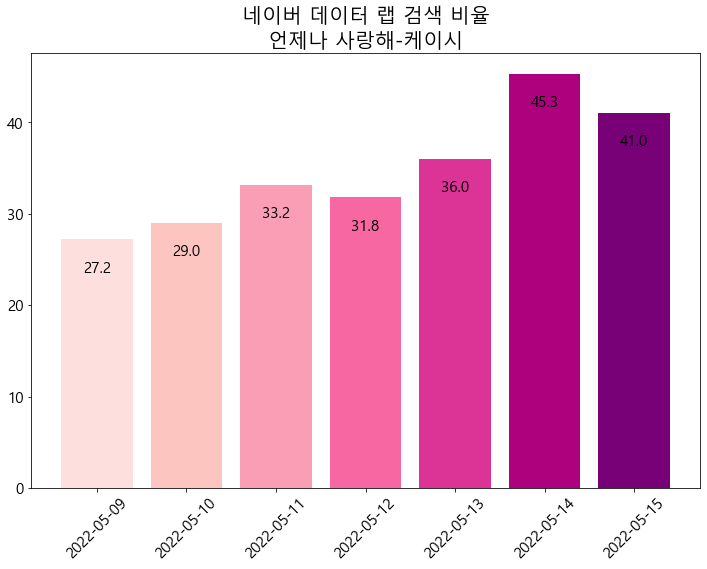

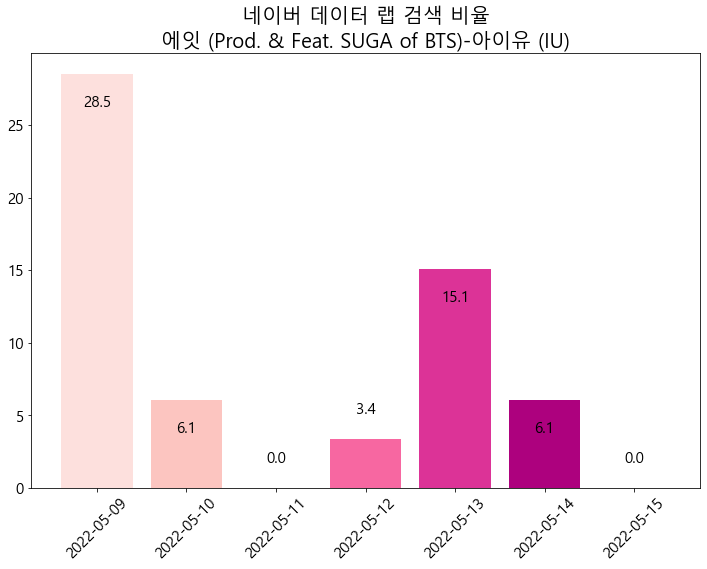

In [115]:
for one in outlier_file_list:
    title = one.split('_')[0]
    artist = one.split('_')[1].split('.')[0]
    temp = pd.read_excel(des + one).reset_index(drop=True)
    temp = temp.iloc[6:, :].reset_index(drop=True)
    temp.columns = ['날짜', '검색비율']

    week_temp = temp[ (temp['날짜'] >= start_date) & (temp['날짜'] <= end_date)].reset_index(drop=True)
    week_temp['검색비율'] = week_temp['검색비율'].astype(float)
    week_temp['검색비율'] = round(week_temp['검색비율'], 1)
    
    colors = sns.color_palette('RdPu', week_temp.shape[0])
    x = week_temp['날짜']
    y = week_temp['검색비율']
    try:
        interval_ratio = math.ceil( max(y) )*0.05
        interval_ratio2 = math.ceil( max(y) )*0.2
        plt.figure( figsize=(12,8) )
        plt.bar(x, y, color=colors)
        plt.title(f"네이버 데이터 랩 검색 비율\n{title}-{artist}", fontsize=20)
        plt.xticks(fontsize=15,rotation=45)
        plt.yticks( fontsize=15)
        for i in range( len(y) ):
                if y[i] <= interval_ratio2:
                    plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                            horizontalalignment='center',
                            verticalalignment='bottom')
                else:
                    plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                            horizontalalignment='center',
                            verticalalignment='top')
        plt.savefig(des + f'{title}_{artist}.png')
        print(f'{title}_{artist}.png 저장 완료.')
    except:
        pass

# 코드 마지막